<a href="https://colab.research.google.com/github/Tanya-Sood/Parameter-Optimization/blob/main/Parameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import random

In [15]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(url, names=cols)

for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

X = df.drop('class', axis=1)
y = df['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
results = []
all_convergences = []

for i in range(10):
    print(f"Running sample S{i+1}")
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=i)

    best_acc = 0
    best_params = {}
    acc_list = []

    for itr in range(100):
        kernel = random.choice(['linear', 'rbf', 'poly', 'sigmoid'])
        nu = round(random.uniform(0.01, 0.9), 2)
        epsilon = round(random.uniform(0.001, 1), 3)

        try:
            model = NuSVC(kernel=kernel, nu=nu)
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            acc = accuracy_score(y_test, preds)
        except:
            acc = 0

        if itr == 0:
            acc_list.append(acc)
        else:
            acc_list.append(max(acc_list[-1], acc))

        if acc > best_acc:
            best_acc = acc
            best_params = {'Kernel': kernel, 'Nu': nu, 'Epsilon': epsilon}

    results.append([f"S{i+1}", round(best_acc * 100, 2), best_params])
    all_convergences.append(acc_list)

Running sample S1
Running sample S2
Running sample S3
Running sample S4
Running sample S5
Running sample S6
Running sample S7
Running sample S8
Running sample S9
Running sample S10


In [18]:
result_df = pd.DataFrame(results, columns=['Sample #', 'Best Accuracy', 'Best SVM Parameters (Kernel, Nu, Epsilon)'])
print(result_df.to_string(index=False))

Sample #  Best Accuracy       Best SVM Parameters (Kernel, Nu, Epsilon)
      S1          98.65 {'Kernel': 'rbf', 'Nu': 0.06, 'Epsilon': 0.242}
      S2          99.42 {'Kernel': 'rbf', 'Nu': 0.03, 'Epsilon': 0.455}
      S3          99.61 {'Kernel': 'rbf', 'Nu': 0.07, 'Epsilon': 0.228}
      S4          99.23 {'Kernel': 'rbf', 'Nu': 0.07, 'Epsilon': 0.963}
      S5          99.04 {'Kernel': 'rbf', 'Nu': 0.09, 'Epsilon': 0.942}
      S6          98.65 {'Kernel': 'rbf', 'Nu': 0.02, 'Epsilon': 0.291}
      S7          99.04 {'Kernel': 'rbf', 'Nu': 0.06, 'Epsilon': 0.026}
      S8          99.42 {'Kernel': 'rbf', 'Nu': 0.02, 'Epsilon': 0.039}
      S9          99.42 {'Kernel': 'rbf', 'Nu': 0.01, 'Epsilon': 0.651}
     S10          99.81 {'Kernel': 'rbf', 'Nu': 0.02, 'Epsilon': 0.959}


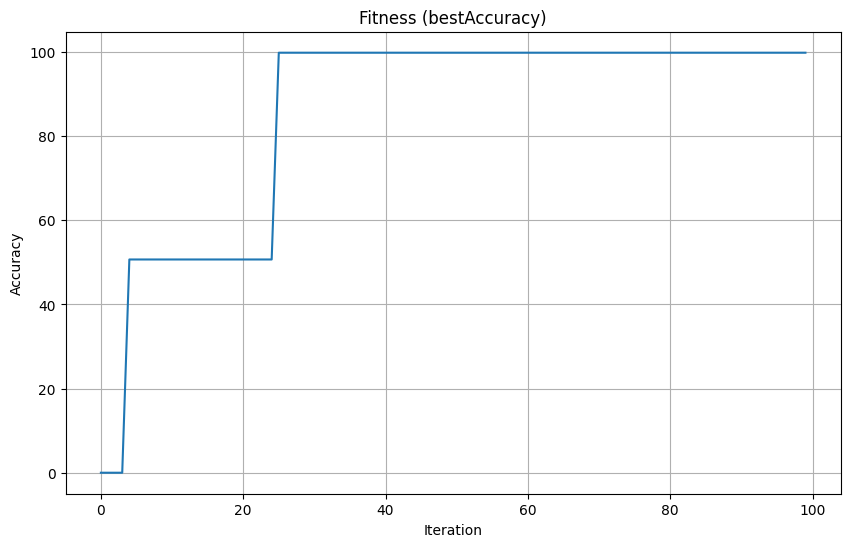

In [19]:
best_idx = np.argmax(result_df['Best Accuracy'])
plt.figure(figsize=(10, 6))
plt.plot([a * 100 for a in all_convergences[best_idx]])
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Fitness (bestAccuracy)')
plt.grid(True)
plt.show()